In [12]:
# ============================================================================
# MODUL 02: ALGORITMA REGRESI LINEAR
# Studi Kasus: Prediksi Sales berdasarkan Budget Advertising (TV, Radio, Newspaper)
# Dataset: Advertising Dataset dari Kaggle
# ============================================================================

# ============================================================================
# LANGKAH 1: PERSIAPAN DATA DAN LIBRARY
# ============================================================================

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Memuat dataset
# Pastikan file 'advertising.csv' sudah didownload dari Kaggle
# Link: https://www.kaggle.com/datasets/ashydv/advertising-dataset
df = pd.read_csv('advertising.csv')

# Memilih kolom TV dan Sales saja
df_selected = df[['TV', 'Sales']].copy()

print("\n" + "="*60)
print("DATASET SETELAH SELEKSI (TV DAN SALES)")
print("="*60)
print(df_selected.head(10))



DATASET SETELAH SELEKSI (TV DAN SALES)
      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2   12.0
3  151.5   16.5
4  180.8   17.9
5    8.7    7.2
6   57.5   11.8
7  120.2   13.2
8    8.6    4.8
9  199.8   15.6



EXPLORATORY DATA ANALYSIS (EDA)

Membuat Pairplot...


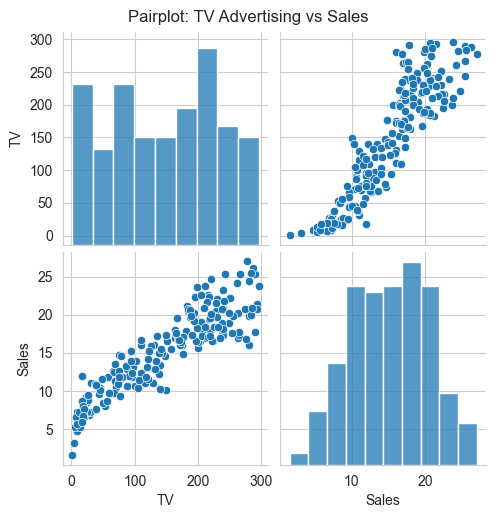

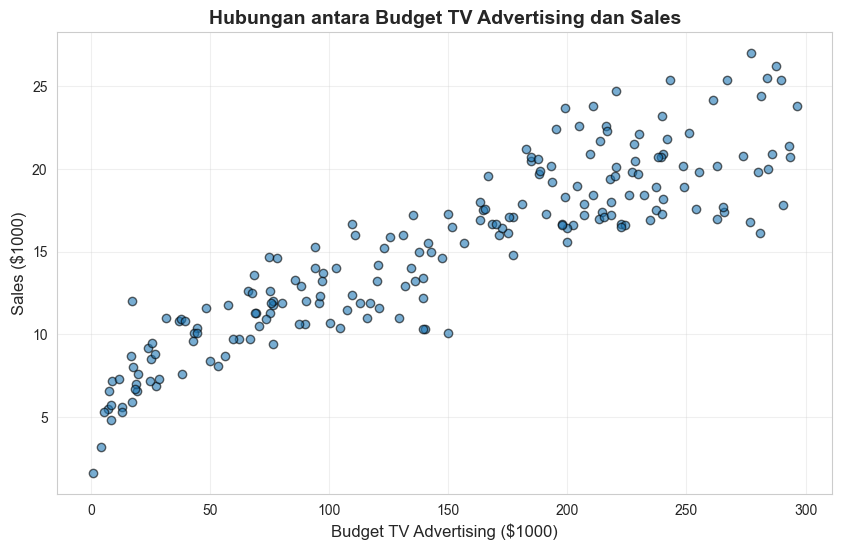

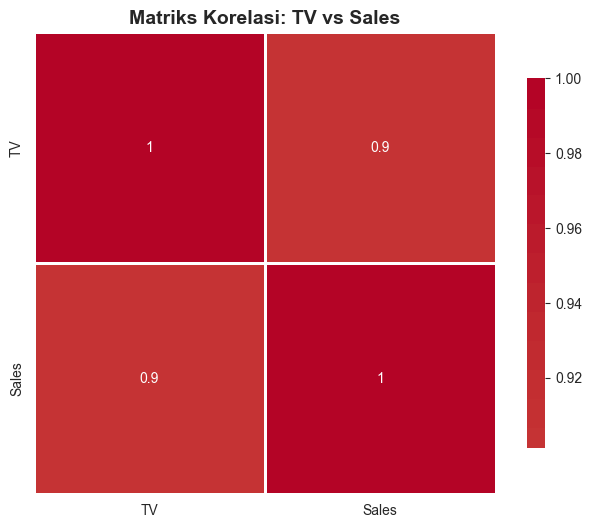


KORELASI ANTARA TV DAN SALES
Koefisien Korelasi: 0.9012


In [13]:
# ====================================================================
# LANGKAH 2: EXPLORATORY DATA ANALYSIS (EDA)
# ====================================================================

print("\n" + "="*60)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*60)

# Visualisasi hubungan antar variabel menggunakan pairplot
print("\nMembuat Pairplot...")
sns.pairplot(df_selected)
plt.suptitle("Pairplot: TV Advertising vs Sales", y=1.02)
plt.show()

# Scatterplot yang lebih detail
plt.figure(figsize=(10, 6))
plt.scatter(df_selected['TV'], df_selected['Sales'], alpha=0.6, edgecolors='k')
plt.xlabel('Budget TV Advertising ($1000)', fontsize=12)
plt.ylabel('Sales ($1000)', fontsize=12)
plt.title('Hubungan antara Budget TV Advertising dan Sales', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

# Heatmap korelasi
plt.figure(figsize=(8, 6))
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriks Korelasi: TV vs Sales', fontsize=14, fontweight='bold')
plt.show()

print("\n" + "="*60)
print("KORELASI ANTARA TV DAN SALES")
print("="*60)
print(f"Koefisien Korelasi: {df_selected['TV'].corr(df_selected['Sales']):.4f}")

In [14]:
# ====================================================================
# LANGKAH 3: PERSIAPAN DATA UNTUK MODEL
# ====================================================================

print("\n" + "="*60)
print("PERSIAPAN DATA UNTUK MODEL")
print("="*60)

# Memisahkan fitur (X) dan target (y)
X = df_selected[['TV']]  # Fitur independen (perlu dalam bentuk 2D)
y = df_selected['Sales']  # Target dependen

print(f"Dimensi X (fitur): {X.shape}")
print(f"Dimensi y (target): {y.shape}")

# Membagi data menjadi data latih (training) dan data uji (testing)
# 70% untuk training, 30% untuk testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


PERSIAPAN DATA UNTUK MODEL
Dimensi X (fitur): (200, 1)
Dimensi y (target): (200,)

Jumlah data training: 140
Jumlah data testing: 60


In [15]:
# ====================================================================
# LANGKAH 4: PELATIHAN MODEL REGRESI LINEAR
# ====================================================================

print("\n" + "="*60)
print("PELATIHAN MODEL REGRESI LINEAR")
print("="*60)

# Membuat instance dari model
model = LinearRegression()

# Melatih model menggunakan data training
model.fit(X_train, y_train)

print("✓ Model berhasil dilatih!")


PELATIHAN MODEL REGRESI LINEAR
✓ Model berhasil dilatih!



PREDIKSI DAN EVALUASI MODEL

10 HASIL PREDIKSI PERTAMA:
 TV Budget  Sales Aktual  Sales Prediksi   Selisih
      74.7          14.7       11.065412  3.634588
     255.4          19.8       21.205917 -1.405917
     112.9          11.9       13.209116 -1.309116
     109.8          16.7       13.035150  3.664850
      31.5          11.0        8.641118  2.358882
      19.4           6.6        7.962092 -1.362092
     262.7          20.2       21.615578 -1.415578
     213.4          17.0       18.848965 -1.848965
     140.3          10.3       14.746746 -4.446746
     220.5          20.1       19.247402  0.852598


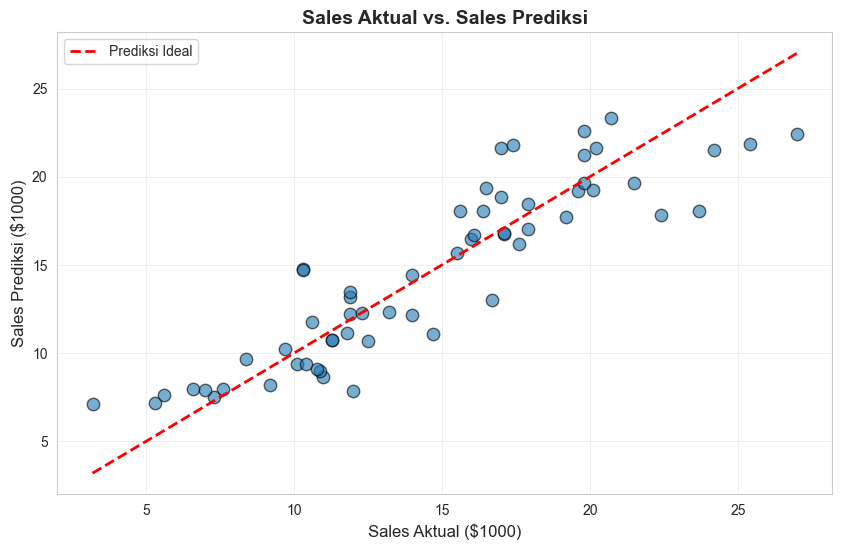

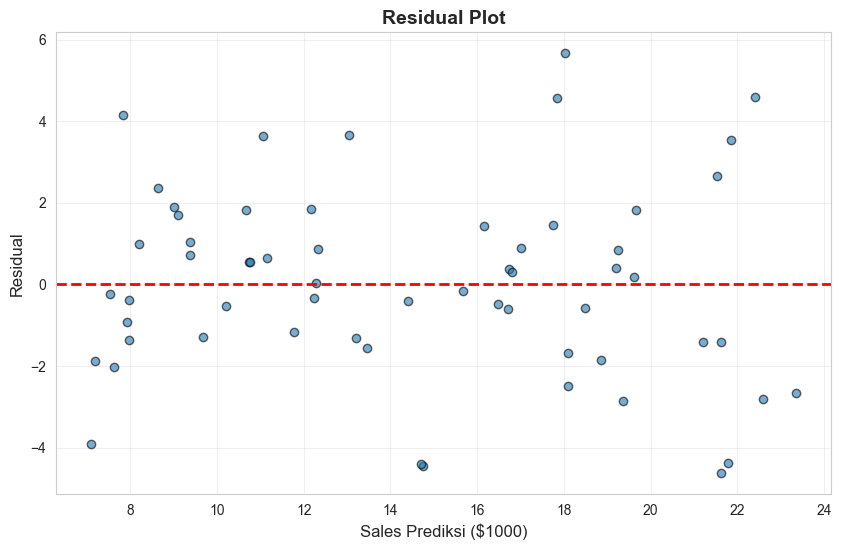


METRIK EVALUASI MODEL
Mean Absolute Error (MAE)     : $1.82K
Mean Squared Error (MSE)      : 5.39
Root Mean Squared Error (RMSE): $2.32K
R-squared (R²)                : 0.8068

Interpretasi R²:
Model dapat menjelaskan 80.68% variasi dalam Sales


In [17]:
# ====================================================================
# LANGKAH 5: PREDIKSI DAN EVALUASI
# ====================================================================

print("\n" + "="*60)
print("PREDIKSI DAN EVALUASI MODEL")
print("="*60)

# Melakukan prediksi pada data test
predictions = model.predict(X_test)

# Menampilkan beberapa hasil prediksi
comparison_df = pd.DataFrame({
    'TV Budget': X_test['TV'].values[:10],
    'Sales Aktual': y_test.values[:10],
    'Sales Prediksi': predictions[:10],
    'Selisih': y_test.values[:10] - predictions[:10]
})

print("\n10 HASIL PREDIKSI PERTAMA:")
print(comparison_df.to_string(index=False))

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='k', s=80)
plt.xlabel("Sales Aktual ($1000)", fontsize=12)
plt.ylabel("Sales Prediksi ($1000)", fontsize=12)
plt.title("Sales Aktual vs. Sales Prediksi", fontsize=14, fontweight='bold')

# Garis ideal (prediksi sempurna)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Prediksi Ideal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualisasi residual plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6, edgecolors='k')
plt.xlabel("Sales Prediksi ($1000)", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.title("Residual Plot", fontsize=14, fontweight='bold')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.grid(True, alpha=0.3)
plt.show()

# Evaluasi performa model
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

print("\n" + "="*60)
print("METRIK EVALUASI MODEL")
print("="*60)
print(f"Mean Absolute Error (MAE)     : ${mae:.2f}K")
print(f"Mean Squared Error (MSE)      : {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}K")
print(f"R-squared (R²)                : {r2:.4f}")

print("\nInterpretasi R²:")
print(f"Model dapat menjelaskan {r2*100:.2f}% variasi dalam Sales")


ANALISIS HASIL MODEL

Intercept (β₀): $6.87K
Coefficient (β₁): 0.0561

PERSAMAAN REGRESI LINEAR
Sales = 6.87 + 0.0561 × TV

atau
Sales = 6.87 + 0.0561 × (Budget TV Advertising)

INTERPRETASI MODEL

1. INTERCEPT (β₀ = $6.87K):
   - Ini adalah nilai prediksi Sales ketika Budget TV Advertising = $0.
   - Artinya: Tanpa iklan TV sama sekali, penjualan dasar diprediksi 
     sekitar $6.87K.
   - Ini merepresentasikan penjualan baseline atau organik.

2. COEFFICIENT (β₁ = 0.0561):
   - Ini menunjukkan hubungan POSITIF antara Budget TV Advertising dan Sales.
   - Interpretasi Praktis: Setiap penambahan $1,000 pada budget iklan TV
     diprediksi akan meningkatkan Sales sebesar $0.0561K atau 
     sekitar $56.12.
   - ROI Insight: Untuk setiap $1 yang diinvestasikan di iklan TV, 
     diharapkan menghasilkan tambahan sales sekitar $0.06.

3. R-SQUARED (R² = 0.8068):
   - Model ini dapat menjelaskan 80.68% variasi dalam Sales.
   - Sisanya (19.32%) dijelaskan oleh faktor lain yang tidak 
     

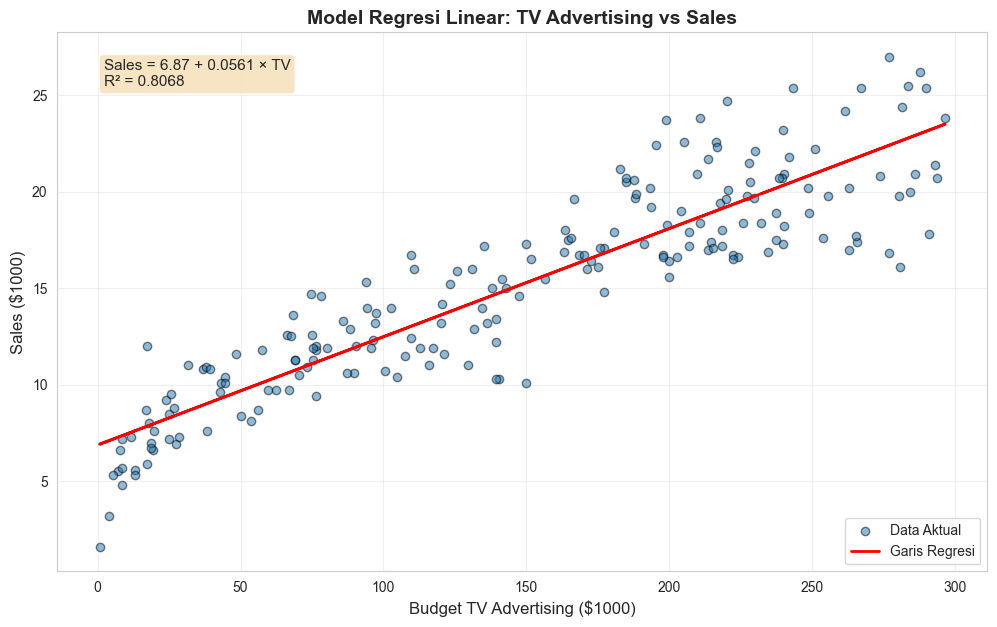


ANALISIS SELESAI!

KESIMPULAN:
Budget TV Advertising terbukti memiliki pengaruh positif yang signifikan
terhadap Sales dengan korelasi 0.9012.
Model regresi linear ini dapat digunakan untuk memprediksi sales
berdasarkan budget iklan TV dengan tingkat akurasi 80.7%.


In [18]:
# ====================================================================
# ANALISIS HASIL
# ====================================================================

print("\n" + "="*60)
print("ANALISIS HASIL MODEL")
print("="*60)

# Menampilkan intersep dan koefisien
intercept = model.intercept_
coefficient = model.coef_[0]

print(f"\nIntercept (β₀): ${intercept:.2f}K")
print(f"Coefficient (β₁): {coefficient:.4f}")

# Persamaan regresi
print("\n" + "="*60)
print("PERSAMAAN REGRESI LINEAR")
print("="*60)
print(f"Sales = {intercept:.2f} + {coefficient:.4f} × TV")
print(f"\natau")
print(f"Sales = {intercept:.2f} + {coefficient:.4f} × (Budget TV Advertising)")

# Interpretasi koefisien
print("\n" + "="*60)
print("INTERPRETASI MODEL")
print("="*60)

print(f"""
1. INTERCEPT (β₀ = ${intercept:.2f}K):
   - Ini adalah nilai prediksi Sales ketika Budget TV Advertising = $0.
   - Artinya: Tanpa iklan TV sama sekali, penjualan dasar diprediksi 
     sekitar ${intercept:.2f}K.
   - Ini merepresentasikan penjualan baseline atau organik.

2. COEFFICIENT (β₁ = {coefficient:.4f}):
   - Ini menunjukkan hubungan POSITIF antara Budget TV Advertising dan Sales.
   - Interpretasi Praktis: Setiap penambahan $1,000 pada budget iklan TV
     diprediksi akan meningkatkan Sales sebesar ${coefficient:.4f}K atau 
     sekitar ${coefficient*1000:.2f}.
   - ROI Insight: Untuk setiap $1 yang diinvestasikan di iklan TV, 
     diharapkan menghasilkan tambahan sales sekitar ${coefficient:.2f}.

3. R-SQUARED (R² = {r2:.4f}):
   - Model ini dapat menjelaskan {r2*100:.2f}% variasi dalam Sales.
   - Sisanya ({(1-r2)*100:.2f}%) dijelaskan oleh faktor lain yang tidak 
     termasuk dalam model (seperti Radio, Newspaper, seasonality, dll).
   - Nilai R² ini menunjukkan model memiliki performa yang {'BAIK' if r2 > 0.7 else 'CUKUP BAIK' if r2 > 0.5 else 'PERLU PERBAIKAN'}.

4. RMSE (${rmse:.2f}K):
   - Rata-rata, prediksi model meleset sekitar ${rmse:.2f}K dari nilai aktual.
   - Dalam konteks rata-rata Sales (${y.mean():.2f}K), ini adalah error 
     sekitar {(rmse/y.mean())*100:.2f}%.
""")

# Visualisasi garis regresi pada data
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.5, edgecolors='k', label='Data Aktual')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Garis Regresi')
plt.xlabel('Budget TV Advertising ($1000)', fontsize=12)
plt.ylabel('Sales ($1000)', fontsize=12)
plt.title('Model Regresi Linear: TV Advertising vs Sales', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Tambahkan persamaan pada plot
equation_text = f'Sales = {intercept:.2f} + {coefficient:.4f} × TV\nR² = {r2:.4f}'
plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, 
         fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.show()

print("\n" + "="*60)
print("ANALISIS SELESAI!")
print("="*60)
print("\nKESIMPULAN:")
print(f"Budget TV Advertising terbukti memiliki pengaruh positif yang signifikan")
print(f"terhadap Sales dengan korelasi {df_selected['TV'].corr(df_selected['Sales']):.4f}.")
print(f"Model regresi linear ini dapat digunakan untuk memprediksi sales")
print(f"berdasarkan budget iklan TV dengan tingkat akurasi {r2*100:.1f}%.")